In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return False
    return True

Estimated area: 1.5144


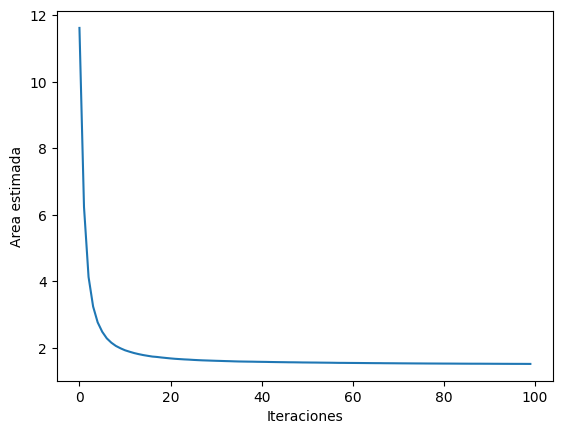

In [5]:
def area_estimada(V, m, K):
    puntos_aleatorios = np.random.uniform(V[0], V[1], size=(m,)) + 1j * np.random.uniform(V[2], V[3], size=(m,))
    x = np.zeros_like(puntos_aleatorios)
    puntos_del_conjunto = np.ones_like(puntos_aleatorios, dtype=bool)
    area_estimada = []
    for k in range(K):
        x[puntos_del_conjunto] = x[puntos_del_conjunto]**2 + puntos_aleatorios[puntos_del_conjunto]
        puntos_del_conjunto[np.abs(x) > 2] = False
        area = puntos_del_conjunto.mean() * (V[1] - V[0]) * (V[3] - V[2])
        area_estimada.append(area)
    return area_estimada

V = [-2.5, 1.5, -2, 2] # dominio

area_estimada = area_estimada(V, m=100000, K=100)
print("Estimated area:", area_estimada[-1])
plt.plot(area_estimada)
plt.xlabel('Iteraciones')
plt.ylabel('Area estimada')
plt.show()

In [6]:
# Diferencia de estimación
dif_estimacion = abs(1.506 - area_estimada[-1])
print("Diferencia de estimación:", dif_estimacion)


Diferencia de estimación: 0.008399999999999963


Mi algoritmo con respecto al valor de estimaciones comúnes dado en el enunciado difiere en pocas unidades en todos los casos, por lo que el algoritmo esta dando una estimacion razonable del conjunto de Mandelbrot

# 5

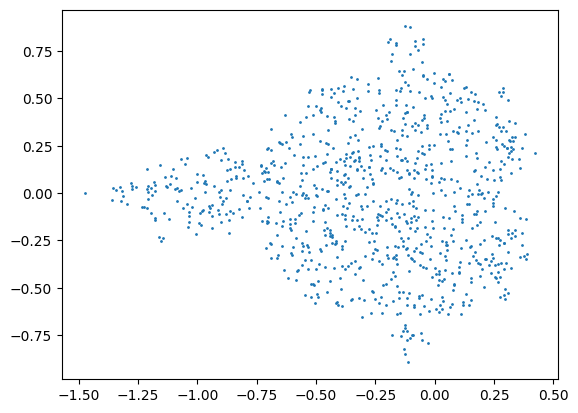

In [7]:
# Utilizando scatter
def visualizacion_scatter(V, m, K):
    # Generar m puntos aleatorios en V
    puntos = np.random.uniform(V[0], V[1], size=(m,)) + 1j * np.random.uniform(V[2], V[3], size=(m,))
    x = np.zeros_like(puntos)
    puntos_del_conjunto = np.ones_like(puntos, dtype=bool)
    for k in range(K):
        x[puntos_del_conjunto] = x[puntos_del_conjunto]**2 + puntos[puntos_del_conjunto]
        puntos_del_conjunto[np.abs(x) > 2] = False
    plt.scatter(puntos[puntos_del_conjunto].real, puntos[puntos_del_conjunto].imag, s=1)
    plt.show()


V = [-2.5, 1.5, -2, 2]

# Visualizar el conjunto de Mandelbrot
visualizacion_scatter(V, m=10000, K=100)

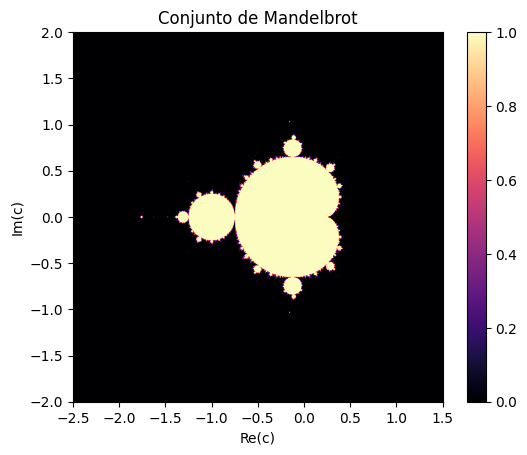

In [8]:
def imshow_conjuntomandelbrot(V, res, K):
    x = np.linspace(V[0], V[1], res)
    y = np.linspace(V[2], V[3], res)
    X, Y = np.meshgrid(x, y)
    puntos = X + 1j * Y
    x = np.zeros_like(puntos)
    puntos_del_conjunto = np.ones_like(puntos, dtype=bool)
    
    for k in range(K):
        x[puntos_del_conjunto] = x[puntos_del_conjunto]**2 + puntos[puntos_del_conjunto]
        puntos_del_conjunto[np.abs(x) > 2] = False

    plt.imshow(puntos_del_conjunto, extent=(V[0], V[1], V[2], V[3]), origin='lower', cmap='magma')
    plt.title('Conjunto de Mandelbrot')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.colorbar()
    plt.show()

V = [-2.5, 1.5, -2, 2]
imshow_conjuntomandelbrot(V, res=1000, K=100)

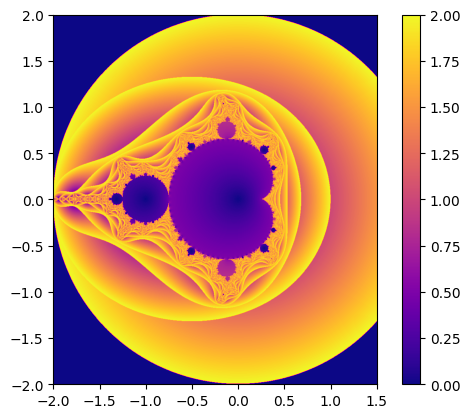

In [14]:


def visualizacion_mandelbrot_porpunto(V, res, K):
    # Generar una cuadrícula de puntos en V
    x = np.linspace(V[0], V[1], res)
    y = np.linspace(V[2], V[3], res)
    X, Y = np.meshgrid(x, y)

    puntos = X + 1j * Y

    x = np.zeros_like(puntos)
    puntos_del_conjunto = np.ones_like(puntos, dtype=bool)
    magnitudes = np.zeros_like(puntos, dtype=float)

    for k in range(K):
        x[puntos_del_conjunto] = x[puntos_del_conjunto]**2 + puntos[puntos_del_conjunto]
        puntos_del_conjunto[np.abs(x) > 2] = False
        magnitudes[puntos_del_conjunto] = np.abs(x[puntos_del_conjunto])

    plt.imshow(magnitudes, extent=(V[0], V[1], V[2], V[3]), origin='lower', cmap='plasma')
    plt.colorbar()
    plt.show()


V = [-2, 1.5, -2, 2]
visualizacion_mandelbrot_porpunto(V, res=1000, K=100)